<a href="https://colab.research.google.com/github/adarshh347/Basics-of-ML/blob/main/Practice_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

# 🟢 ML 6  [Easy] Query, Key, Value Initialisation from input Tensor ✅

Problem Statement:
Given an input tensor x of shape (batch_size, seq_len, embed_dim):

Create three nn.Linear layers: query_proj, key_proj, value_proj.

Project x into q, k, and v.

Task:
<p>🔹 Print the shapes of q, k, and v. <p>
🔹 Visualize the first few elements (e.g., q[0, 0], k[0, 0], v[0, 0]) to see how embeddings change after projection.

In [ ]:
# Input Tensor Initialization
batch_size = 2
seq_len = 5
embed_dim = 32
head_dim = 8  # we'll project down to head_dim

# Input
print(f"x: {torch.randn(batch_size, seq_len, embed_dim)}")

x: tensor([[[-1.0309, -0.8425, -0.7341, -1.9028, -1.2033, -0.4983,  0.8760,
          -2.3520, -0.0809, -0.6548, -0.7300,  1.0683,  0.1322, -0.6033,
          -1.7056,  0.1264, -1.5555, -0.2900, -0.7212, -0.3981, -0.2704,
           1.5350, -1.7085, -2.2704, -0.0433, -1.3055,  0.0381, -0.7209,
          -0.1585,  1.1642,  0.6176,  0.0241],
         [ 0.9233,  1.1441,  0.8647, -0.8024,  0.3691, -0.0426, -0.6373,
          -0.5195, -0.7965, -0.6881, -0.1762,  0.3819, -0.7745, -0.8503,
           0.0064,  2.0484,  1.3227,  0.3157,  0.6264, -0.4624, -0.5199,
          -0.7592,  0.6966, -0.7268, -1.3624, -0.8380, -0.1501, -0.3377,
           1.5903,  0.4387,  0.3311, -0.5246],
         [-0.3982, -1.1630,  0.3896,  0.9602, -0.4563,  0.8305, -0.2617,
           0.0535, -0.4055,  1.1722, -0.9875,  0.8153, -1.3911, -0.0825,
          -1.6208,  0.4614,  1.3079,  0.9965, -1.1292, -0.4249, -0.3330,
          -0.9717, -0.5992,  1.2678,  0.2219,  0.0384,  0.5273,  0.1253,
          -1.3568,  0.6498,

In [ ]:
print(x.size())

torch.Size([2, 5, 32])


In [ ]:
query_proj = nn.Linear(embed_dim,head_dim)
key_proj = nn.Linear(embed_dim,head_dim)
value_proj = nn.Linear(embed_dim,head_dim)
q=query_proj(x)
k=key_proj(x)
v=value_proj(x)

In [ ]:
print(v.size())

torch.Size([2, 5, 8])


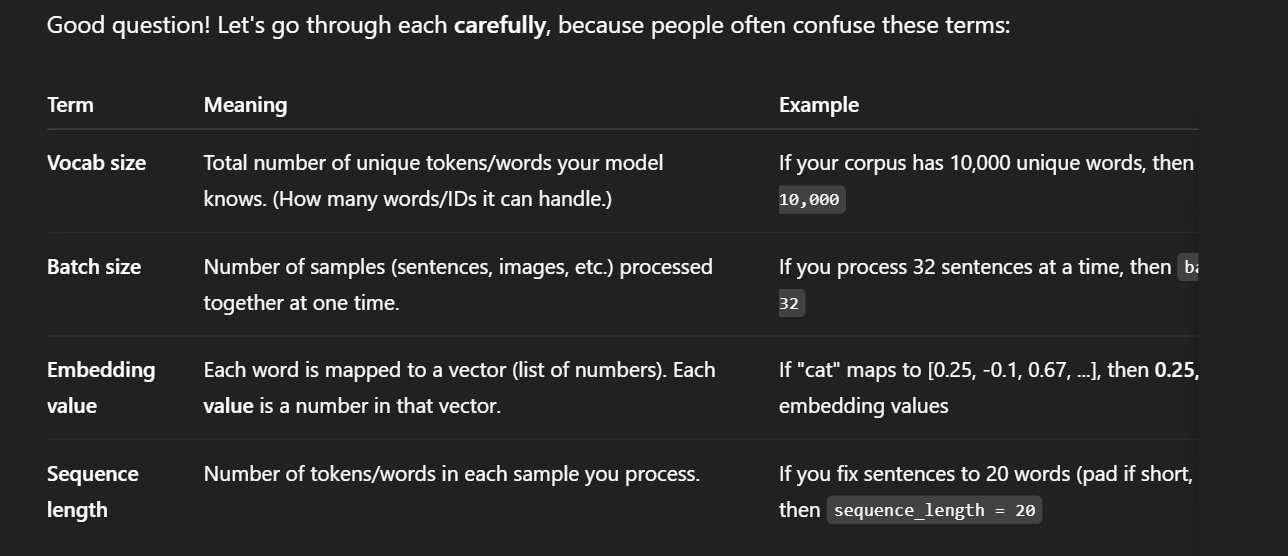

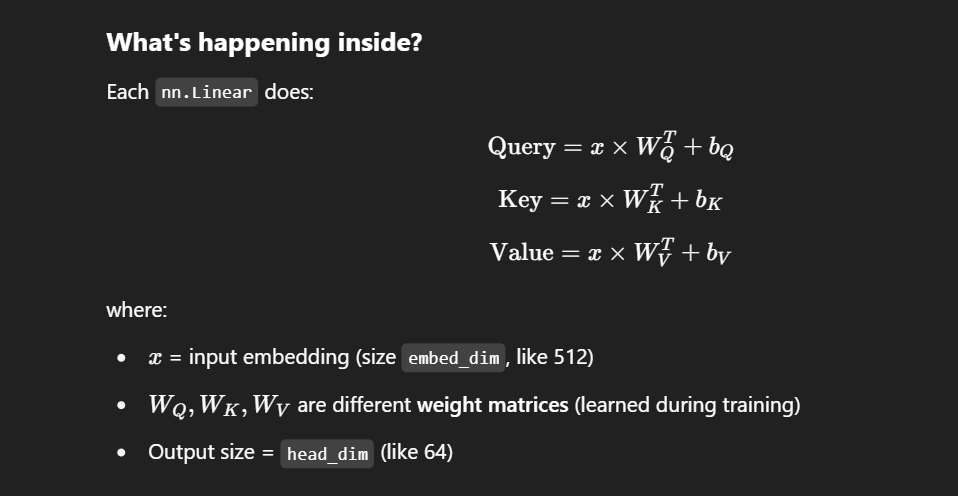

# 🟢 ML 7 [Easy] Manually Compute Scaled Dot-Product Attention ✅



Problem Statement:
Given projected q and k:

Compute attention scores using batch matrix multiplication: torch.bmm(q, k.transpose(-2, -1)).

Scale scores by 1/√(head_dim).

Apply softmax across last dimension.

Task:</p>
🔹 Print the raw attention scores before softmax.</p>
🔹 Print softmaxed attention matrix after applying softmax.</p>
🔹 Comment: "Do all rows sum to ~1?" — quick sanity check!

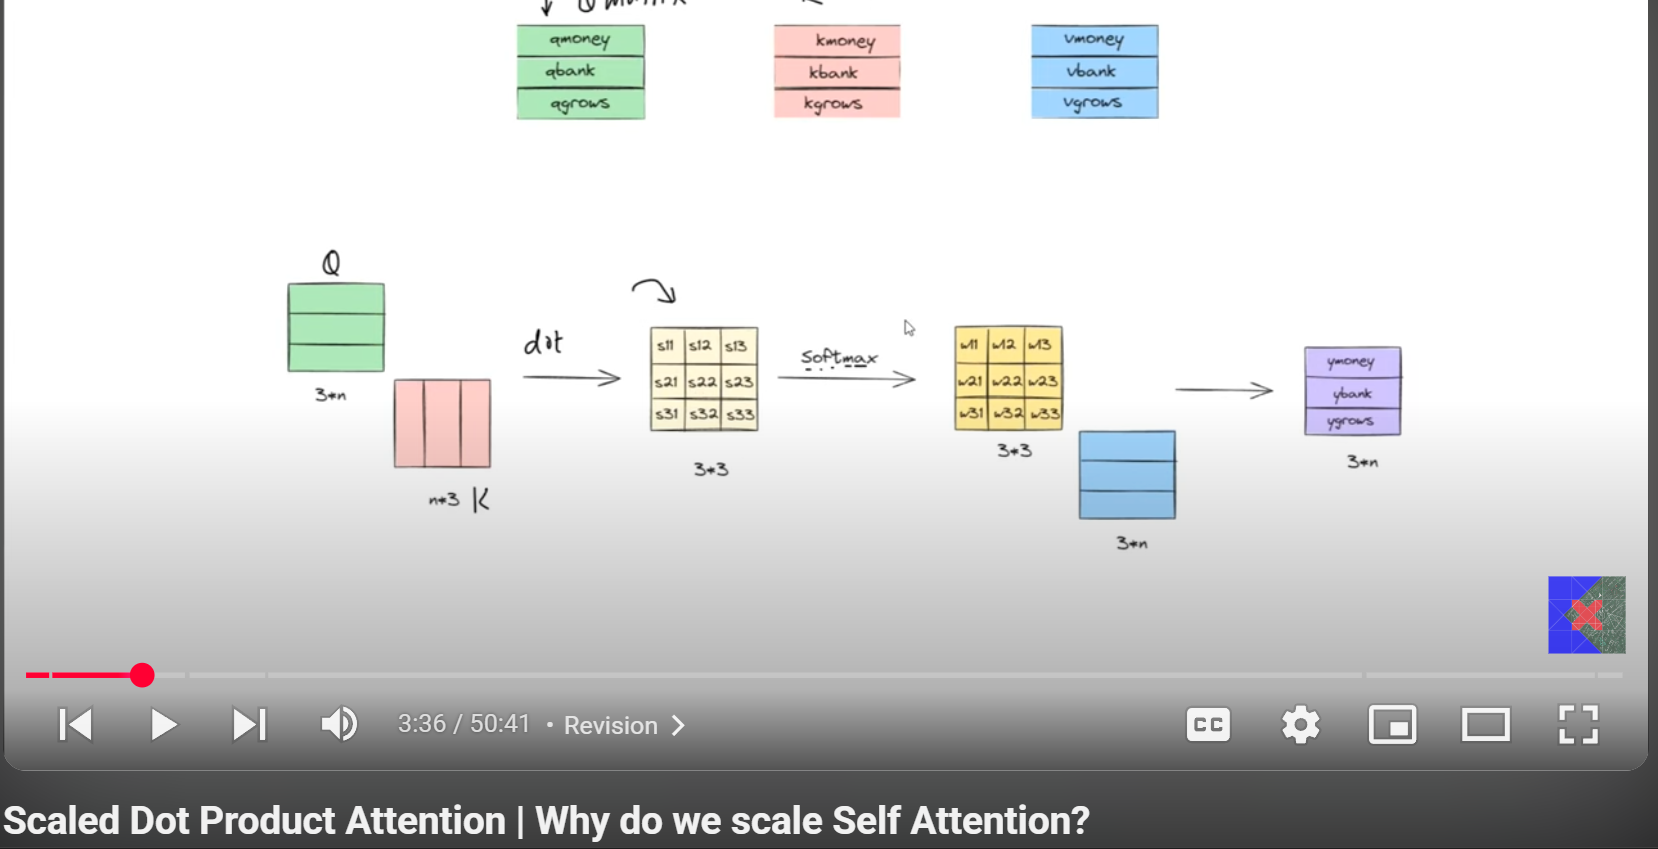

In [ ]:
q = torch.randn(1, 3, 8)
k = torch.randn(1, 2, 8)
# attention_scores.shape → (batch_size, seq_len_q, head_dim)
head_dim=8

In [ ]:
k_transposed= k.transpose(1,2)
attn_score = torch.bmm(q,k_transposed)
print(attn_score)

tensor([[[ 1.3598, -2.4588, -2.1185],
         [ 0.0710,  0.6036, -1.1900],
         [-4.5740, -6.8151, -2.0503]]])


In [ ]:
import math
sqrt_val=math.sqrt(head_dim)
attn_score=attn_score/sqrt_val
print(attn_score)

tensor([[[ 0.4808, -0.8693, -0.7490],
         [ 0.0251,  0.2134, -0.4207],
         [-1.6171, -2.4095, -0.7249]]])


In [ ]:
import torch.nn.functional as F
attn_score = F.softmax(attn_score,dim=-1)

In [ ]:
2 1 3
1 4 5

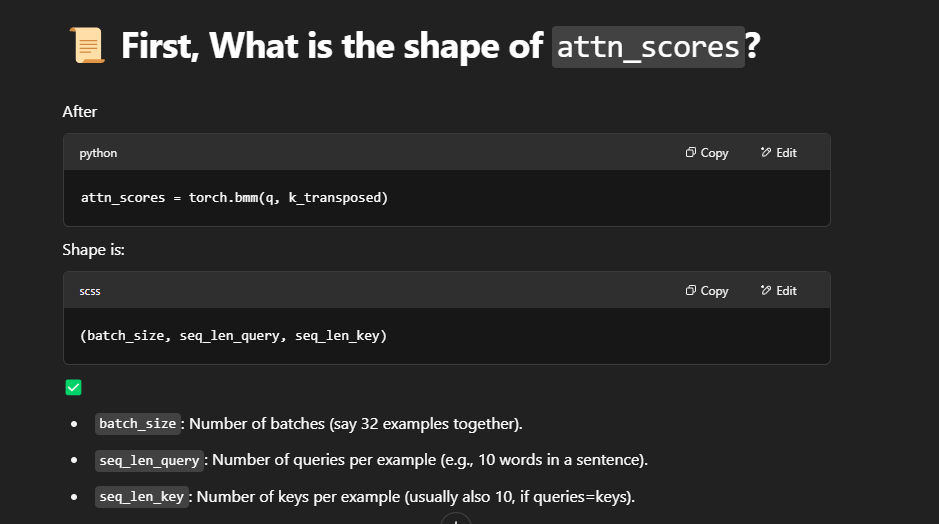

In [ ]:
# Shape: (1, 3, 3)

# Imagine:
# [
#   [  # batch 0
#     [ q1.k1, q1.k2, q1.k3 ],  # 1st query compared with all keys
#     [ q2.k1, q2.k2, q2.k3 ],  # 2nd query compared with all keys
#     [ q3.k1, q3.k2, q3.k3 ]   # 3rd query compared with all keys
#   ]
# ]


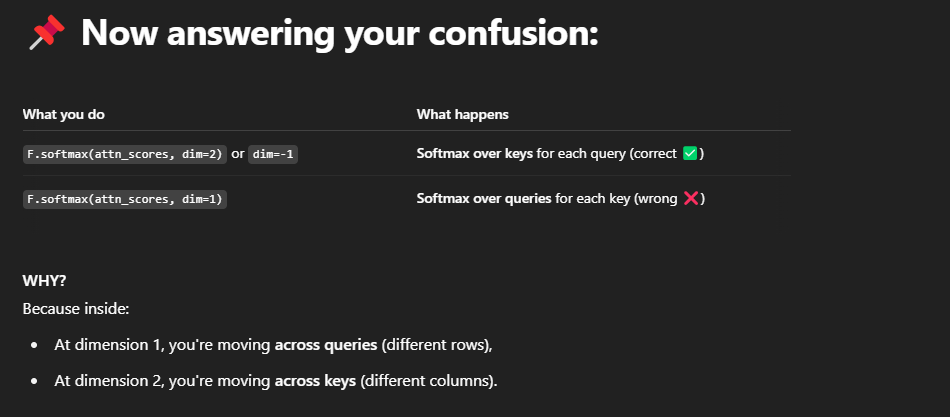

# 🟢 ML 8  [Easy] Calculate CrossEntropyLoss ✅

empty

In [ ]:
# Logits from your model for a batch of 3 samples
logits = torch.tensor([
    [2.0, 1.0, 0.1, 0.5, 0.3],   # model thinks class 0 is best
    [0.1, 0.2, 3.0, 0.3, 0.5],   # model thinks class 2 is best
    [0.4, 0.9, 0.1, 0.2, 2.5]    # model thinks class 4 is best
])

# Ground truth token indices (actual class for each row)
targets = torch.tensor([0, 2, 4])


In [ ]:
loss_fn=nn.CrossEntropyLoss()
loss=loss_fn(logits,targets)
print(loss)

tensor(0.4349)


# 🔴 ML 9 (Hard): Sentence Embedding Encoder

**💡Average Pooling** </p>

Problem:
Implement a Transformer-based encoder that converts input sentences (tokenized) into a single sentence embedding. Use average pooling over the final hidden states.

Input Format:

["hello world", "this is a test"]</p>
Output Format: Tensor of shape (batch_size, hidden_dim) — each sentence mapped to a fixed-size vector.

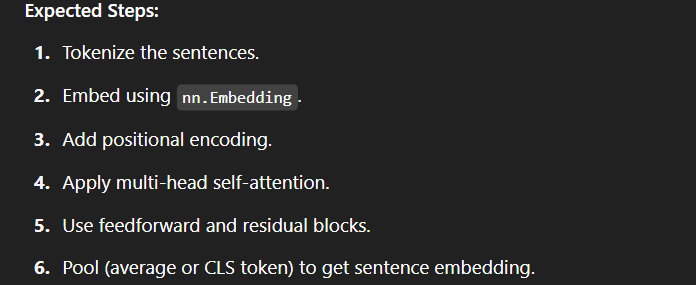

In [ ]:

# Input Format:

# ["hello world", "this is a test"]
# Output Format: Tensor of shape (batch_size, hidden_dim) — each sentence mapped to a fixed-size vector.

# 🟠 ML 10  [Medium] Visualizing Positional Encoding Patterns [Understood Soln]






**💡Sinusoidal Positional Encodings** </p>


Implement a module that generates positional encodings using sine and cosine functions for a given embedding dimension d_model and maximum length max_len. Then:

Plot the positional encodings for one specific dimension (say, dim=0, dim=1, dim=2, dim=3).

Describe how the patterns change across dimensions.



In [ ]:
# In the context of positional embeddings (particularly sinusoidal embeddings in the Transformer model),
# dimensions (dim or d_model) refer to the embedding size—the length of the vector used to represent each token's position.


In [ ]:
d_model = 8
max_len = 100


In [ ]:
# https://chatgpt.com/share/6811ed10-aee0-800d-b34c-31dc59f48687

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class PositionalEncoding(nn.Module):
  def __init__(self, d_model: int, max_len: int = 5000):
    super(PositionalEncoding, self).__init__()
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position*div_term)
    pe[:, 1::2] = torch.cos(position*div_term)
    self.register_buffer('pe',pe)
  def forward(self,x):
    x=x+self.pe[:x.size(1)]
    return x

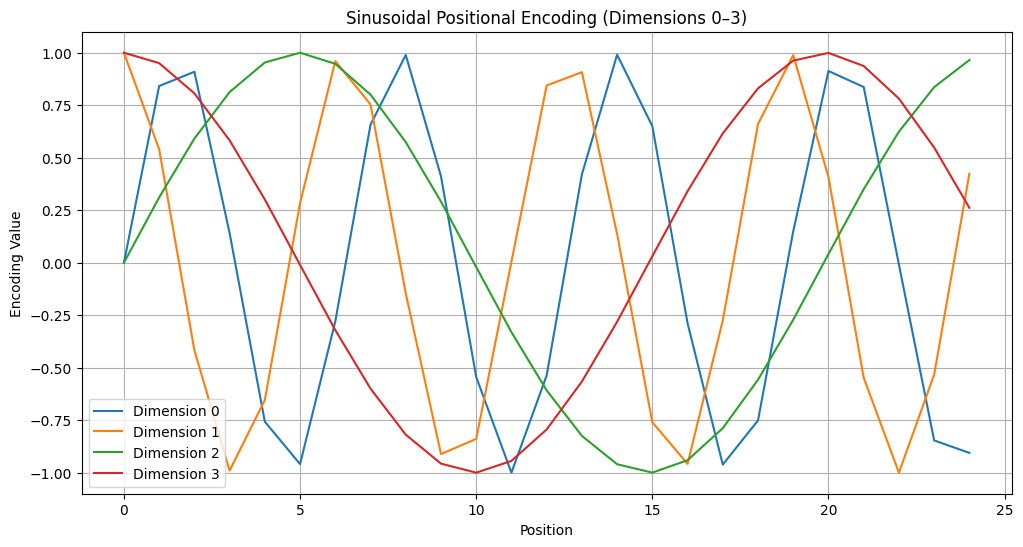

In [ ]:
# Parameters
d_model = 16
max_len = 25

# Initialize the positional encoding
pe = PositionalEncoding(d_model, max_len)
pe_values = pe.pe  # Shape: (max_len, d_model)

# Plot dimensions 0 to 3
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.plot(torch.arange(max_len), pe_values[:, i], label=f"Dimension {i}")

plt.title("Sinusoidal Positional Encoding (Dimensions 0–3)")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

In [ ]:
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
print(div_term)

tensor([1.0000e+00, 1.0000e-01, 1.0000e-02, 1.0000e-03])
